# Feature Selection / Dimensionality Reduction
- TF-IDF normalization
- Principal Component Analysis
- Multi-dimensional Scaling

In [2]:
# Load the original dataset
import pandas as pd
df_annotated = pd.read_csv("tweet_data/annotated/annotations.csv")
display(df_annotated)

,Text,Label
0,@China_Amb_India Fucking piece of shit your wh...,Hate
1,I’m not being funny but #Coronavirus in.... ...,Neutral
2,Got on the Victoria Line today to seven sister...,Hate
3,It's appalling that the media &amp; libtards b...,Hate
4,Dude fuck the Chinese man fuck em and if you t...,Hate
...,...,...
2314,"""Asian Americans need allies who will interven...",Counterhate
2315,The People’s Collective for Justice and Libera...,Neutral
2316,"During this COVID19 crisis, @onlywon &amp; I ...",Neutral
2317,Tune into @RadioCanadaInfo for stories from th...,Neutral


In [4]:
# Load the BERT feature and HATE feature extracted
import pickle
feature_BERT = pickle.load(open("feature_BERT.pkl", "rb"))
feature_HATE = pickle.load(open("feature_HATE.pkl", "rb"))
# BERT features are continuous, dense
display(feature_BERT.shape)
display(feature_BERT[:5, :])
# HATE features are sparse
display(feature_HATE.shape)
display(feature_HATE[:5, :])

(2319, 768)

array([[ 0.46086738,  0.3488624 ,  0.03938765, ..., -0.07256336,
         0.11062867, -0.23470797],
       [ 0.18441598, -0.09388659,  0.22499946, ..., -0.29473585,
         0.32366252,  0.21586719],
       [ 0.10946336,  0.09413552,  0.23619254, ..., -0.21285078,
         0.30369708,  0.1180046 ],
       [ 0.40606505,  0.3983904 ,  0.04854618, ..., -0.09641529,
         0.248677  , -0.27958405],
       [ 0.24275361,  0.34516788,  0.39922163, ..., -0.16132681,
         0.16915712, -0.03645353]], dtype=float32)

(2319, 60)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

## TF-IDF
We can use TF-IDF to evaluate how "important" a term is, in the original tweets dataset with annotations. Then, we could use a threshold on the metric to extract "important" terms and get aother version of the tweet dataset based on these terms.

In [15]:
MAX_FEATURES = 1000
# Apply the TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
raw_texts = df_annotated["Text"].values.tolist()
vectorizer = TfidfVectorizer(stop_words="english", max_features=MAX_FEATURES)
X = vectorizer.fit_transform(raw_texts)
words = vectorizer.get_feature_names()
print(X.shape)

(2319, 1000)


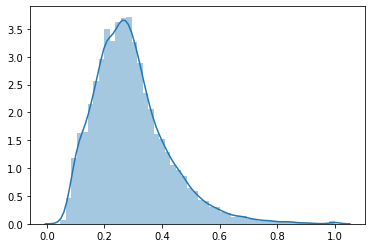

In [16]:
# Display the distribution plot for the values
import seaborn as sns
sns.distplot(X.data)

In [18]:
print(words)

['000', '10', '100', '14', '19', '1olhdcvt8p', '20', '2019', '2019ncov', '2020', '28', '3rd', '40', '50', '650', 'aapi', 'abc', 'absolutely', 'acceptable', 'accountable', 'accused', 'act', 'acts', 'acttochange', 'actual', 'actually', 'ad', 'add', 'administer', 'administration', 'africa', 'african', 'age', 'agency', 'ago', 'agree', 'aid', 'aids', 'aims', 'ain', 'air', 'aka', 'alive', 'allies', 'allowed', 'allowing', 'america', 'american', 'americans', 'amid', 'amp', 'animal', 'animals', 'anti', 'anymore', 'aoc', 'apologize', 'appreciate', 'april', 'area', 'aren', 'armor', 'article', 'asia', 'asian', 'asianamerican', 'asianamericans', 'asians', 'ask', 'asking', 'ass', 'asses', 'asshole', 'assholes', 'ate', 'atm', 'attack', 'attacked', 'attacks', 'australia', 'australian', 'avigan', 'avoid', 'awareness', 'away', 'awful', 'baby', 'bad', 'ban', 'based', 'basically', 'bastards', 'bat', 'bats', 'bbc', 'bc', 'beat', 'becool2asians', 'beijing', 'believe', 'bernie', 'best', 'bet', 'better', 'big

In [24]:
# Some examples for TF-IDF statistics extracted from the text
# We may use the X matrix as features
import numpy as np
EXAMPLE_INDICES = range(5)
for i in EXAMPLE_INDICES:
    example_nonzero_indices = X[i, :].nonzero()[1]
    example_words = zip(np.array(words)[example_nonzero_indices], X[i, example_nonzero_indices].A.squeeze())
    print("TEXT: \n%s \nTF-IDF:" % (df_annotated["Text"].values[i]))
    for word, tfidf in sorted(example_words, key=lambda x : x[1], reverse=True):
        print("%s \t %.2f" % (word, tfidf))

TEXT: 
@China_Amb_India Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet. 
TF-IDF:
planet 	 0.45
responsible 	 0.44
piece 	 0.42
community 	 0.36
chinese 	 0.32
world 	 0.25
fucking 	 0.24
shit 	 0.22
virus 	 0.16
TEXT: 
I’m not being funny but #Coronavirus in....   China  Iran  Italy   That’s some pretty random shit. 
TF-IDF:
random 	 0.47
pretty 	 0.45
funny 	 0.45
italy 	 0.38
iran 	 0.36
shit 	 0.21
china 	 0.17
coronavirus 	 0.14
TEXT: 
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that i’m gonna get the bat virus ffs 
TF-IDF:
cunt 	 0.63
worried 	 0.33
line 	 0.33
im 	 0.31
gonna 	 0.28
today 	 0.26
bat 	 0.26
got 	 0.23
virus 	 0.11
chinese 	 0.11
TEXT: 
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one se

In [27]:
# Examples on reconstructing the texts
# We may use BERT on reconstrcuted words to extract features
EXAMPLE_INDICES = range(5)
for i in EXAMPLE_INDICES:
    example_words = np.array(words)[X[i, :].nonzero()[1]]
    print("ORIGINAL TEXT:")
    print(df_annotated["Text"].values[i])
    print("RECONSTRUCTED WORDS:" )
    print(example_words)

ORIGINAL TEXT:
@China_Amb_India Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet.
RECONSTRUCTED WORDS:
['planet' 'world' 'virus' 'chinese' 'responsible' 'community' 'shit'
 'piece' 'fucking']
ORIGINAL TEXT:
I’m not being funny but #Coronavirus in....   China  Iran  Italy   That’s some pretty random shit.
RECONSTRUCTED WORDS:
['random' 'pretty' 'italy' 'iran' 'china' 'coronavirus' 'funny' 'shit']
ORIGINAL TEXT:
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that i’m gonna get the bat virus ffs
RECONSTRUCTED WORDS:
['bat' 'gonna' 'worried' 'im' 'cunt' 'today' 'line' 'got' 'virus'
 'chinese']
ORIGINAL TEXT:
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one seems to give a shit about the poor lives of the dogs &amp; c

## PCA
We could apply the PCA on the BERT features and the HATE features, and see what we got.

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(np.concatenate((feature_BERT, feature_HATE), axis=1))
print(pca.explained_variance_ratio_)

[1.48918906e-01 7.97659463e-02 5.33566233e-02 3.71749515e-02
 3.39069456e-02 2.73266449e-02 2.49314012e-02 2.19505113e-02
 1.92742662e-02 1.68030482e-02 1.55873200e-02 1.38171472e-02
 1.30235784e-02 1.20995305e-02 1.11439868e-02 1.10148351e-02
 1.04288370e-02 9.61874526e-03 9.36045389e-03 8.55921395e-03
 8.14903224e-03 7.93176188e-03 7.67072068e-03 6.97695025e-03
 6.88374195e-03 6.82041153e-03 6.43622011e-03 5.98283861e-03
 5.82167703e-03 5.60523631e-03 5.47019855e-03 5.31950312e-03
 5.13070289e-03 5.01652422e-03 4.79873812e-03 4.76028648e-03
 4.49177954e-03 4.25551645e-03 4.19818452e-03 4.02150188e-03
 3.85310170e-03 3.81313770e-03 3.70697375e-03 3.64321361e-03
 3.63648773e-03 3.55757321e-03 3.34923056e-03 3.28200139e-03
 3.19883283e-03 3.11572685e-03 3.08233292e-03 2.99531179e-03
 2.95663493e-03 2.93621165e-03 2.83454763e-03 2.79369578e-03
 2.71864940e-03 2.69889676e-03 2.66834499e-03 2.65071256e-03
 2.56250606e-03 2.52064776e-03 2.46381376e-03 2.41363510e-03
 2.39628479e-03 2.347359

Text(0.5, 0, 'Component')

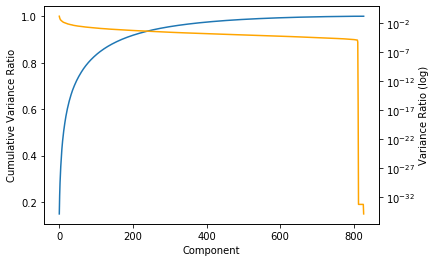

In [49]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
ax.set_ylabel("Cumulative Variance Ratio")

ax2.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, c="orange")
ax2.set_yscale("log")
ax2.set_ylabel("Variance Ratio (log)")

ax.set_xlabel("Component")

In [59]:
# A simple idea is to set a threshold of the variance that we want to keep
VARIANCE_RATIO = 0.95
num_components = np.sum(np.cumsum(pca.explained_variance_ratio_) <= VARIANCE_RATIO)
pca_X = pca.transform(np.concatenate((feature_BERT, feature_HATE), axis=1))[:, :num_components]
display(transformed_X.shape)


(2319, 282)

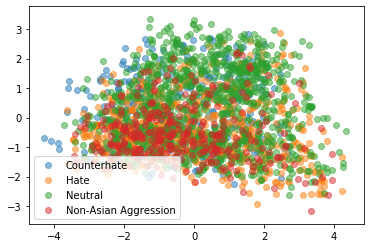

In [89]:
# Let's see how are the points distributed in first two dimensions
figure, ax = plt.subplots()
labels = np.unique(df_annotated["Label"])
for i, label in enumerate(labels):
    indices = np.where(df_annotated["Label"] == label)
    xs = pca_X[indices, 0].squeeze()
    ys = pca_X[indices, 1].squeeze()
    ax.scatter(xs, ys, label=label, alpha=0.5)

plt.legend()

# MDS (Multi-dimensional Scaling)

In [92]:
from sklearn.manifold import MDS
N_COMPONENTS = 100
mds = MDS(n_components=N_COMPONENTS)
mds_X = mds.fit_transform(np.concatenate((feature_BERT, feature_HATE), axis=1))

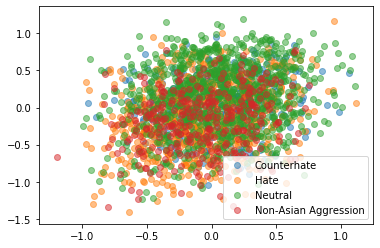

In [93]:
# Let's see how are the points distributed in first two dimensions
figure, ax = plt.subplots()
labels = np.unique(df_annotated["Label"])
for i, label in enumerate(labels):
    indices = np.where(df_annotated["Label"] == label)
    xs = mds_X[indices, 0].squeeze()
    ys = mds_X[indices, 1].squeeze()
    ax.scatter(xs, ys, label=label, alpha=0.5)

plt.legend()